In [1]:
! pip install requests pandas matplotlib python-dotenv

In [2]:
import requests
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [3]:
load_dotenv() # Get the .env file

FRED_API_KEY = os.getenv('FRED_API') # Fetching the FRED API key from environment variables

fred_url = 'https://api.stlouisfed.org/fred/series/observations' # Fred API endpoint we will be using



In [4]:
# Specify the params for the Api Endpoint
params = {
    'api_key': FRED_API_KEY,
    'file_type': 'json',
    'series_id': 'CPIAUCSL',
    'observation_start': '1975-01-01',
    'units': 'ch1',
    'frequency': 'm'
}

response = requests.get(url=fred_url, params=params) # url + specified params
response.raise_for_status()
data = response.json() # Parse the JSON

In [5]:
print(f'API Response:\n{json.dumps(data, indent=4)}') #Print the data

API Response:
{
    "realtime_start": "2025-08-29",
    "realtime_end": "2025-08-29",
    "observation_start": "1975-01-01",
    "observation_end": "9999-12-31",
    "units": "ch1",
    "output_type": 1,
    "file_type": "json",
    "order_by": "observation_date",
    "sort_order": "asc",
    "count": 607,
    "offset": 0,
    "limit": 100000,
    "observations": [
        {
            "realtime_start": "2025-08-29",
            "realtime_end": "2025-08-29",
            "date": "1975-01-01",
            "value": "5.5"
        },
        {
            "realtime_start": "2025-08-29",
            "realtime_end": "2025-08-29",
            "date": "1975-02-01",
            "value": "5.3"
        },
        {
            "realtime_start": "2025-08-29",
            "realtime_end": "2025-08-29",
            "date": "1975-03-01",
            "value": "5.0"
        },
        {
            "realtime_start": "2025-08-29",
            "realtime_end": "2025-08-29",
            "date": "1975-04-01"

In [6]:
observations = data['observations'] # Separate the data

df_cpi = pd.DataFrame(observations)[['date', 'value']] # Create a Data Frame

df_cpi['date'] = pd.to_datetime(df_cpi['date'])      # Convert to date type
df_cpi['value'] = pd.to_numeric(df_cpi['value'], errors='coerce')  # Convert tu numeric type


df_cpi.to_csv("cpi_data.csv")

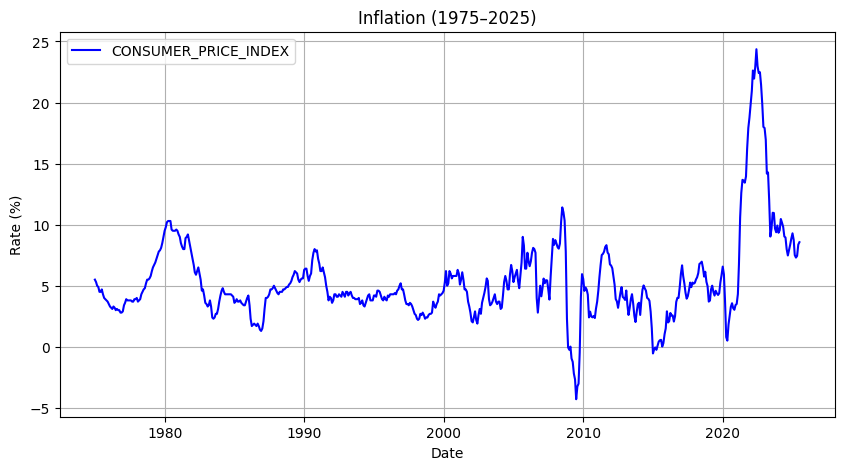

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df_cpi['date'], df_cpi['value'], label='CONSUMER_PRICE_INDEX', color='blue')

plt.title('Inflation (1975–2025)')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()